In [3]:
import numpy as np
import matplotlib.pyplot as plt 

from toy_script import load_data
from scipy.interpolate import CubicSpline

from pre_process import *
from concurrent.futures import ThreadPoolExecutor

In [4]:
#Data importation
X_train, y_train, X_test = load_data("./")

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


The line $i^{th}$ gives the $i^{th}$ time serie, where $i\in [0,3499]$.

The column $512\times(j-2)+k$ gives the $k^{th}$ time step of the $j^{th}$ captor, where $k\in [0,511]$ and $j\in [2,33]$.

Therefore, X_train\[ i , 512 * ( j - 2 ) + k \] gives the $k^{th}$ time step of the $i^{th}$ time serie of the $j^{th}$ captor.

In [3]:
#CD = captor dictionary
cd_number={
    "HBR":2,
    "HT":3,
    "HAX":4,
    "HAY":5,
    "HAZ":6,
    "HGX":7,
    "HGY":8,
    "HGZ":9,
    "HMX":10,
    "HMY":11,
    "HMZ":12,
    "CT":13,
    "CAX":14,
    "CAY":15,
    "CAZ":16,
    "CGX":17,
    "CGY":18,
    "CGZ":19,
    "CMX":20,
    "CMY":21,
    "CMZ":22,
    "FT":23,
    "FAX":24,
    "FAY":25,
    "FAZ":26,
    "FGX":27,
    "FGY":28,
    "FGZ":29,
    "FMX":30,
    "FMY":31,
    "FMZ":32
}
cd_name={
    2:"Heart beat rate",
    3:"Hand temperature",
    4:"Hand acceleration in the x direction",
    5:"Hand acceleration in the y direction",
    6:"Hand acceleration in the z direction",
    7:"Hand gyroscope in the x direction",
    8:"Hand gyroscope in the y direction",
    9:"Hand gyroscope in the z direction",
    10:"Hand magnetometer in the x direction",
    11:"Hand magnetometer in the y direction",
    12:"Hand magnetometer in the z direction",
    13:"Chest temperature",
    14:"Chest acceleration in the x direction",
    15:"Chest acceleration in the y direction",
    16:"Chest acceleration in the z direction",
    17:"Chest gyroscope in the x direction",
    18:"Chest gyroscope in the y direction",
    19:"Chest gyroscope in the z direction",
    20:"Chest magnetometer in the x direction",
    21:"Chest magnetometer in the y direction",
    22:"Chest magnetometer in the z direction",
    23:"Foot temperature",
    24:"Foot acceleration in the x direction",
    25:"Foot acceleration in the y direction",
    26:"Foot acceleration in the z direction",
    27:"Foot gyroscope in the x direction",
    28:"Foot gyroscope in the y direction",
    29:"Foot gyroscope in the z direction",
    30:"Foot magnetometer in the x direction",
    31:"Foot magnetometer in the y direction",
    32:"Foot magnetometer in the z direction"
}


In [6]:
def acces_captor_ts(X_train, captor_number:int,ts:int):
    """
    This function returns the data of a captor given its number
    """
    #captor data for a specific time serie
    data=[]
    data.extend([X_train[ts, 512 * (captor_number - 2) + k] for k in range(0, 512, 1)])
    return  data

def get_time_set():
    """
    This function returns the time set of a time serie
    """
    #times array
    dt=5/511 #5s for 511 points
    t=[]
    t.extend([k*dt] for k in range(0,512,1))
    return t


def display_ts_feature(captor:int,X_train,ts:int):
    """
    Function that plot the time series(ts) of a feature for a specific captor
    """
    t=get_time_set()
    captor_ts=acces_captor_ts(X_train,captor,ts)
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, captor_ts)
    plt.title(cd_name[captor])
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

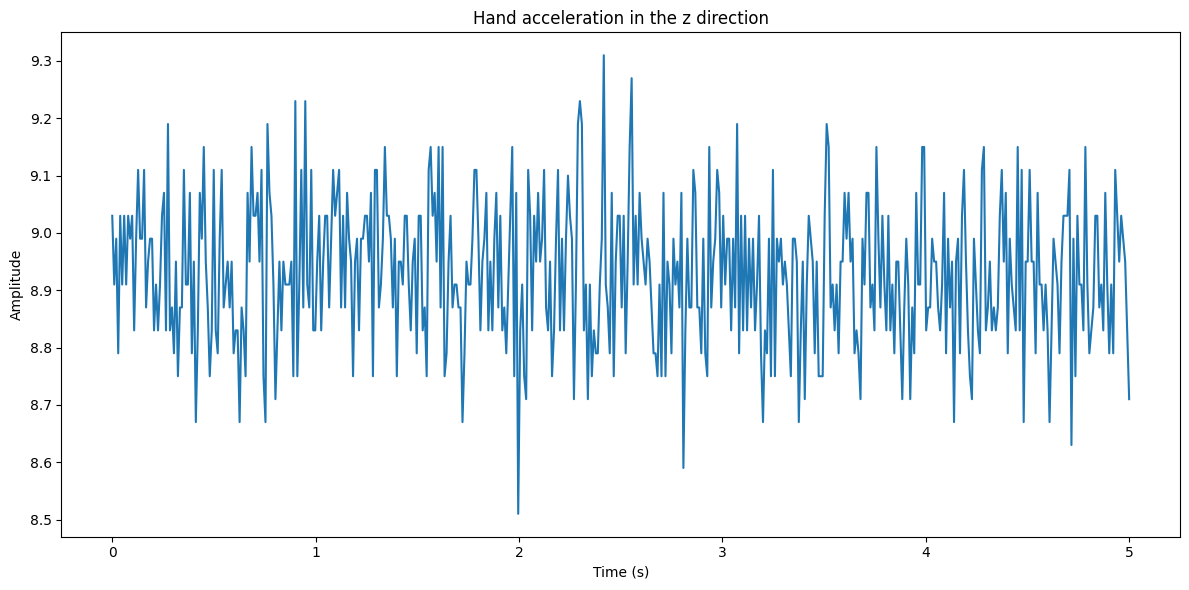

In [9]:
display_ts_feature(6,X_train,444)


In [ ]:
display_ts_feature(cd_number[dt_],X_train,600)

In [9]:
hand_acceleration = []
hand_acceleration.extend([X_train[600, 512 * (4 - 2) + k] for k in range(0, 512, 1)])
print(len(hand_acceleration))

hand_acceleration = hand_acceleration - np.mean(hand_acceleration)

fft_result = np.fft.fft(hand_acceleration)  # Fourier transform
frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only


plt.figure(figsize=(12, 6))

# plot of heart beat
plt.subplot(2, 1, 1)
plt.plot(duration, hand_acceleration)
plt.title("hand acceleration in one direction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot of fourier spectrum
plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_amplitude, 'r')
plt.title("Fourier spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

arg_max = np.argmax(positive_amplitude)
max_frequency = positive_freqs[arg_max]
print(max_frequency)

512


NameError: name 'time_step' is not defined

Function that calculates the major frequencies of a signal

In [37]:
def signal_frequencies(signal,duration,threshold,DC=False,time_step=5/511):
    """
        calculates the major frequencies of a signal:
        signal is a numpy table with the signal points
        duration is a numpy table containing the time steps related to the signal points
        threshold is the number of frequencies we want to have 
        DC = True if we don't remove the constant signal 
        DC = False (default value) if we remove the constant signal 
        time_step is the time between two points
    """

    if type(threshold) != int :
        raise ValueError("threshold is not an integer in function signal_frequencies")
    elif len(signal) != len(duration):
        raise ValueError("signal and duration have not the same size in function signal_frequencies")
    
    if DC == False:
        signal = signal - np.mean(signal) #remove the constant signal
    

    """Calculation of the FT"""
    fft_result = np.fft.fft(signal)  # Fourier transform
    frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
    amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
    positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
    positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only

    """Calculation of the major frequencies"""
    major_frequencies = []
    for j in range(0,threshold,1):
        arg_max = np.argmax(positive_amplitude)
        max_frequency = positive_freqs[arg_max]
        major_frequencies.append(max_frequency)
        # Suppresion of the found frequency from the signal
        index = 0
        while positive_amplitude[arg_max-index]-positive_amplitude[arg_max-(index+1)] > 1e-3: #suppression of the pic before the max point
            positive_amplitude[arg_max-(index+1)] = -1
            print("ok1")

            if positive_amplitude[arg_max - (index+1)] <= 1e-2:
                break # we end the loop if the signal goes to zero (avoid issues at the beginning of the signal)
            index += 1

        index = 0
        while positive_amplitude[arg_max + index]-positive_amplitude[arg_max + (index+1)] > 1e-3:
            positive_amplitude[arg_max+(index+1)] = -1
            print("ok2")
            if positive_amplitude[arg_max + (index+1)] <= 1e-2:
                break # we end the loop if the signal goes to zero (avoid issues at the end of the signal)
            index += 1

        positive_amplitude[arg_max] = -1
        
        """plt.figure(figsize=(12, 6))

        # plot of heart beat
        plt.subplot(2, 1, 1)
        plt.plot(duration, hand_acceleration)
        plt.title("hand acceleration in one direction")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

        # plot of fourier spectrum
        plt.subplot(2, 1, 2)
        plt.plot(positive_freqs, positive_amplitude, 'r')
        plt.title("Fourier spectrum")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.grid()
        plt.tight_layout()
        plt.show()"""

    return major_frequencies

ok1
ok2
ok1
ok2
ok1
ok2
ok1
ok2
ok1
ok2
[np.float64(50.70078125), np.float64(9.18203125), np.float64(14.970703125), np.float64(50.101953125), np.float64(47.1078125)]


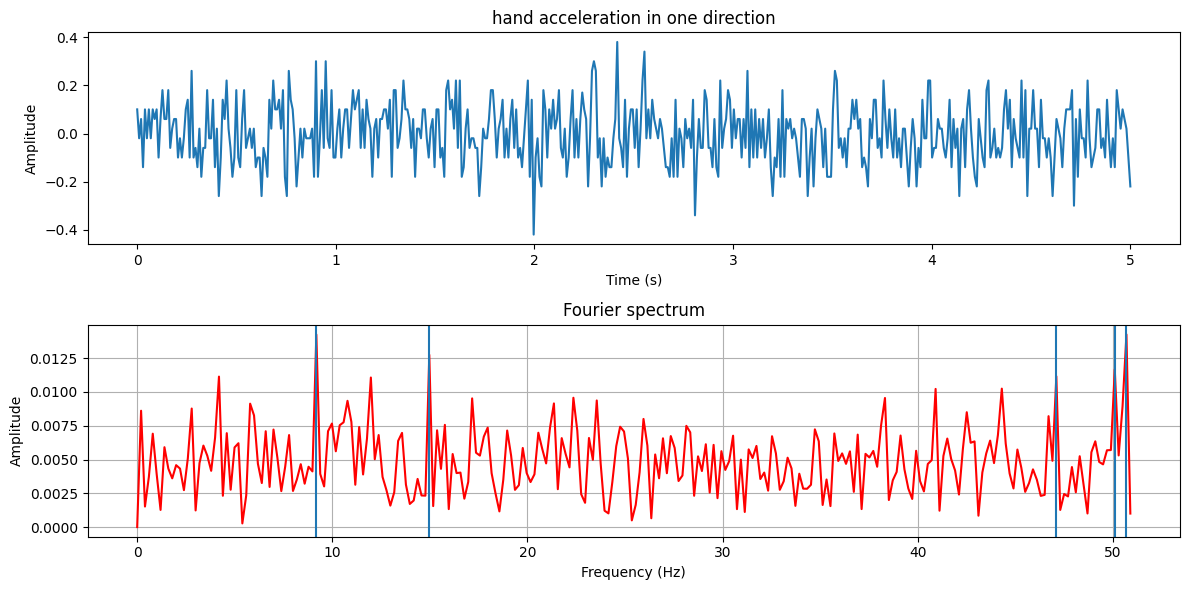

In [38]:
hand_acceleration = []
hand_acceleration.extend([X_train[444, 512 * (6 - 2) + k] for k in range(0, 512, 1)])

time_step = 5/511
duration = []
duration.extend([k*time_step] for k in range(0,512,1))

hand_acceleration = hand_acceleration - np.mean(hand_acceleration)

fft_result = np.fft.fft(hand_acceleration)  # Fourier transform
frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only

major_frequencies = signal_frequencies(hand_acceleration,duration,5)
print(major_frequencies)

plt.figure(figsize=(12, 6))

# plot of heart beat
plt.subplot(2, 1, 1)
plt.plot(duration, hand_acceleration)
plt.title("hand acceleration in one direction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot of fourier spectrum
plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_amplitude, 'r')
plt.title("Fourier spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
for freq in major_frequencies:
   plt.axvline(freq)
plt.tight_layout()
plt.show()

following function calculate the proportion of missing value
let's say that if more than 10% of the data, we will dump the ts

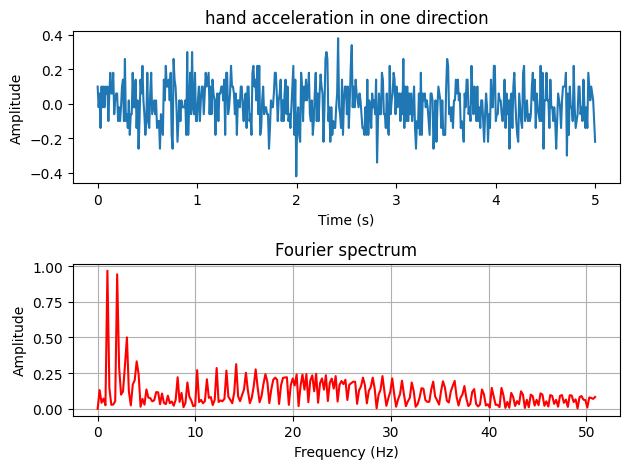

5


In [23]:
signal = acces_captor_ts(X_train,6,445) - np.mean(acces_captor_ts(X_train,6,445))

fft_result = np.fft.fft(signal)  # Fourier transform
frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only

  # plot of heart beat

plt.subplot(2, 1, 1)
plt.plot(duration, hand_acceleration)
plt.title("hand acceleration in one direction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot of fourier spectrum
plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_amplitude, 'r')
plt.title("Fourier spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

print(np.argmax(positive_amplitude))

In [94]:
def propo_missing_values(captor:int,X_train,ts):
    """
    Function that returns the propotion of missing values for a captor
    """
    data=acces_captor_ts(X_train,captor,ts)
    count=data.count(-999999.99)
    prop = count / 512
    return prop


In [68]:
propo_missing_values(cd_number["CT"],X_train,600)

1.0

In [95]:
def Interpolation_missing_measures(signal,duration):
    # remove missing points -> encoded as -999999.99
    indices_miss = []
    signal_prime = signal
    duration_prime = duration
    k=0
    for i in range(0,len(signal),1):
    
        if signal[i] <= -999990.0:
            signal_prime = np.delete(signal_prime, k)
            duration_prime = np.delete(duration_prime, k)
        else:
            k += 1
        

    # interpolation
    interpol = CubicSpline(duration_prime,signal_prime)

    # add the missing points 
    #for j in indices_miss:
    signal = interpol(duration)
    
    return signal


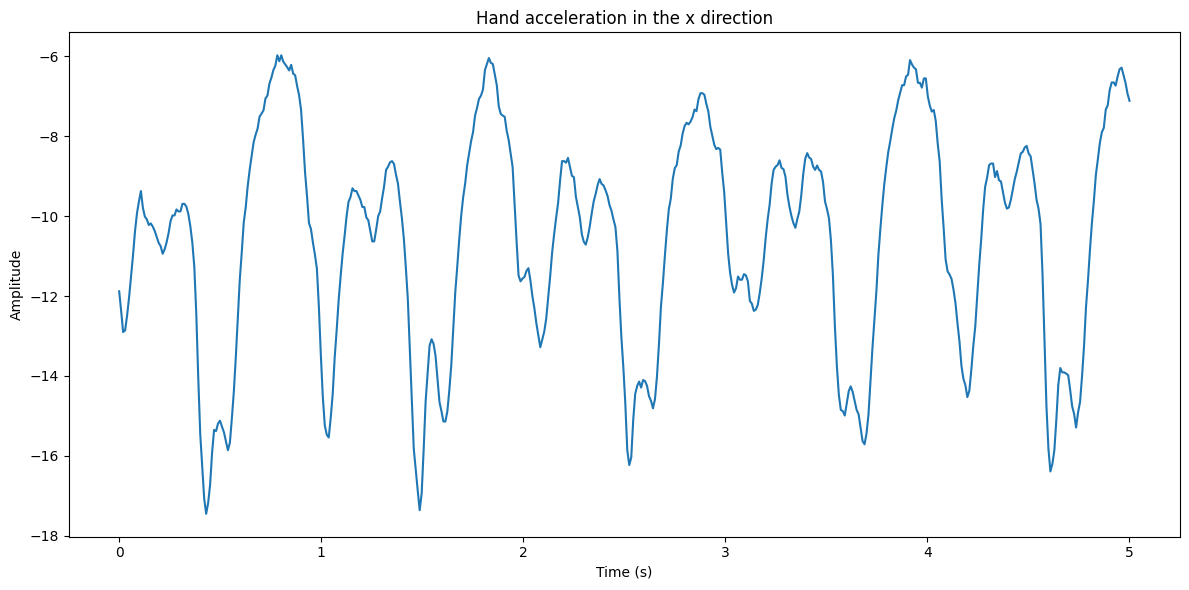

In [28]:
display__ts_feature(cd_number["HAX"],X_train,600)

-16.35
-16.87
-13.49
[-16.73305027]
[-17.25949138]
[-13.51775769]


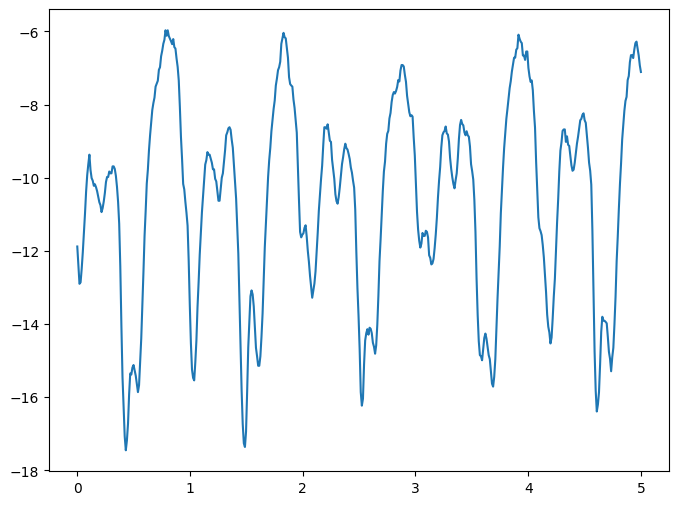

In [69]:
hand_acceleration = []
hand_acceleration.extend([X_train[600, 512 * (4 - 2) + k] for k in range(0, 512, 1)])
print(hand_acceleration[150])
print(hand_acceleration[151])
print(hand_acceleration[160])
hand_acceleration[150]=-999999.99
hand_acceleration[151]=-999999.99
hand_acceleration[160]=-999999.99

signal = Interpolation_missing_measures(hand_acceleration,duration)

plt.figure(figsize=(8,6))
plt.plot(duration,signal)

print(signal[150])
print(signal[151])
print(signal[160])


In [ ]:
# This function make a copy of the data-> might be really heavy

def preprocessing_missing(X_train,threshold,duration):
    """
    Function that returns the data without missing points or with the feature deleted if too much missing points in initial data
    """
    data = []
    for ts in range(0,3500,1):

        captor_and_time_steps = []
        
        for captor_number in range(2,33,1):
        
            signal = acces_captor_ts(X_train,captor_number,ts)

            #interpolation if not too much missing points
            if propo_missing_values(captor_number,X_train,ts) <= threshold :
                signal = Interpolation_missing_measures(signal,duration)
            
            #Erase feature if too much missing points
            else:
                # Je ne sais pas comment supprimer toute la feature sans poser de problèmes pour ensuite entrainer un algo 
                
            
            # the columns of the final matrix are the curves for each captor for a given time serie
            captor_and_time_steps.append(signal)
        # the lines are the different time series
        data.append(captor_and_time_steps)

    return data

IndentationError: expected an indented block after 'else' statement on line 20 (3521406286.py, line 25)

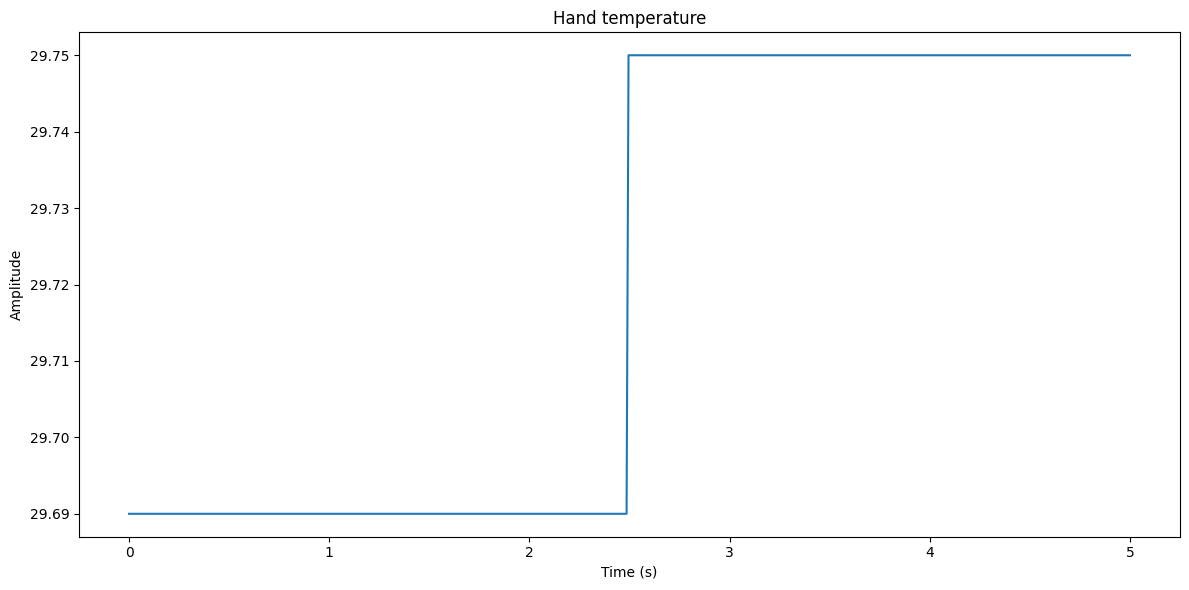

In [ ]:
display__ts_feature(cd_number["HT"],X_train)

Moyenne et pente 

In [97]:
def mean_and_slope(signal,duration):

    """returns the mean of the signal and the slope of a linear fit"""

    # mean
    mean = np.mean(signal)

    # slope
    m, b = np.polyfit(duration, signal, 1)

    return mean, m


Reduction of the dimensionality of the data

In [122]:
def usable_data(data,duration,frequencies_number):

    """
    returns a 2D list of data that contains the 3500 times series in the rows 
    and the columns are the data reduced from the time curves for each captor.
    The first line contains the titles of the columns
    data is of size 3500 X 31*512 and usable data is of size 3500 X (4*2 + 27*frequencies_number) -> high dimensionality reduction !

    frequencies_number is the wanted number of frequencies kept from the FT of the time curves
    """

    captor_fourier = [4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32]#captors for which we will do a FT
    captor_mean_slope = [2,3,13,23] #we will calculate the mean and the slope for other captors

    n_columns = len(captor_mean_slope)*2 + len(captor_fourier)*frequencies_number 
    #because 2 elements (mean and slope for captors in captor_mean_slope) and frequencies_number elements for each captor in captor_fourier

    usable_data = [[0] * n_columns] #creation of the final list with the right number of columns

    # titles to columns
    for i in range(2,33,1):
        
        if i <= 3:
            usable_data[0][(i-2)*2] = cd_name.get(i) + " mean"
            usable_data[0][(i-2)*2 + 1] = cd_name.get(i) + " slope"
        elif i == 13: 
            usable_data[0][3+9*frequencies_number+1] = cd_name.get(i) + " mean"
            usable_data[0][3+9*frequencies_number+2] = cd_name.get(i) + " slope"
        elif i == 23: 
            usable_data[0][3+9*frequencies_number+2+9*frequencies_number+1] = cd_name.get(i) + " mean"
            usable_data[0][3+9*frequencies_number+2+9*frequencies_number+2] = cd_name.get(i) + " slope"
        else:
            for j in range(1,frequencies_number+1,1):
                if i <= 12:
                    usable_data[0][3+(i-4)*frequencies_number+j] = cd_name.get(i) + f" freq {j}"
                elif i <= 22:
                    usable_data[0][3+9*frequencies_number+2+(i-14)*frequencies_number+j] = cd_name.get(i) + f" freq {j}"
                else:
                    usable_data[0][3+18*frequencies_number+4+(i-24)*frequencies_number+j] = cd_name.get(i) + f" freq {j}"


    for ts in range(0,3500,1):#the lines of the final matrix are the 3500 time series
        reduced_captors_curves = []
        for captor_number in range(2,33,1): #the columns are the reduced data for each captor

            signal = acces_captor_ts(data,captor_number,ts)

            if captor_number in captor_fourier:
                freqs = signal_frequencies(signal,duration,frequencies_number)
                reduced_captors_curves.append(freqs)
            
            else:
                mean, slope  = mean_and_slope(signal,duration)
                reduced_captors_curves.append(mean)
                reduced_captors_curves.append(slope)
            
        usable_data.append(reduced_captors_curves)
    return usable_data





Test to see if the assignment of titles works in  the previous function

In [ ]:
frequencies_number = 2

captor_fourier = [4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32]#captors for which we will do a FT
captor_mean_slope = [2,3,13,23] #we will calculate the mean and the slope for other captors

n_columns = len(captor_mean_slope)*2 + len(captor_fourier)*frequencies_number 
#because 2 elements (mean and slope for captors in captor_mean_slope) and frequencies_number elements for each captor in captor_fourier

usable_data = [[0] * n_columns] #creation of the final list with the right number of columns
print(len(usable_data[0]))

# titles to columns
for i in range(2,33,1):
    
    if i <= 3:
        usable_data[0][(i-2)*2] = cd_name.get(i) + " mean"
        usable_data[0][(i-2)*2 + 1] = cd_name.get(i) + " slope"
    elif i == 13: 
        usable_data[0][3+9*frequencies_number+1] = cd_name.get(i) + " mean"
        usable_data[0][3+9*frequencies_number+2] = cd_name.get(i) + " slope"
    elif i == 23: 
        usable_data[0][3+9*frequencies_number+2+9*frequencies_number+1] = cd_name.get(i) + " mean"
        usable_data[0][3+9*frequencies_number+2+9*frequencies_number+2] = cd_name.get(i) + " slope"
    else:
        for j in range(1,frequencies_number+1,1):
            if i <= 12:
                usable_data[0][3+(i-4)*frequencies_number+j] = cd_name.get(i) + f" freq {j}"
            elif i <= 22:
                usable_data[0][3+9*frequencies_number+2+(i-14)*frequencies_number+j] = cd_name.get(i) + f" freq {j}"
            else:
                usable_data[0][3+18*frequencies_number+4+(i-24)*frequencies_number+j] = cd_name.get(i) + f" freq {j}"

print(usable_data)

62
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
[['Heart beat rate mean', 'Heart beat rate slope', 'Hand temperature mean', 'Hand temperature slope', 'Hand acceleration in the x direction freq 1', 'Hand acceleration in the x direction freq 2', 'Hand acceleration in the y direction freq 1', 'Hand acceleration in the y direction freq 2', 'Hand acceleration in the z direction freq 1', 'Hand acceleration in the z direction freq 2', 'Hand gyroscope in the x direction freq 1', 'Hand gyroscope in the x direction freq 2', 'Hand gyroscope in the y direction freq 1', 'Hand gyroscope in the y direction freq 2', 'Hand gyroscope in the z direction freq 1', 'Hand gyroscope in the z direction freq 2', 'Hand magnetometer in the x direction freq 1', 'Hand magnetometer in the x direction freq 2', 'Hand magnetometer in the y direction freq 1', 'Hand magnetometer in the y direction freq 2', 'Hand magnetometer in the z direction freq 1', 'Hand magnetometer in the z d

In [ ]:
key = 32

print(description)

Foot magnetometer in the z direction


# test mutliprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

from toy_script import load_data
from scipy.interpolate import CubicSpline
from sklearn.neighbors import NearestNeighbors



#CD = captor dictionary
cd_number={
    "HBR":2,
    "HT":3,
    "HAX":4,
    "HAY":5,
    "HAZ":6,
    "HGX":7,
    "HGY":8,
    "HGZ":9,
    "HMX":10,
    "HMY":11,
    "HMZ":12,
    "CT":13,
    "CAX":14,
    "CAY":15,
    "CAZ":16,
    "CGX":17,
    "CGY":18,
    "CGZ":19,
    "CMX":20,
    "CMY":21,
    "CMZ":22,
    "FT":23,
    "FAX":24,
    "FAY":25,
    "FAZ":26,
    "FGX":27,
    "FGY":28,
    "FGZ":29,
    "FMX":30,
    "FMY":31,
    "FMZ":32
}
cd_name={
    2:"Heart beat rate",
    3:"Hand temperature",
    4:"Hand acceleration in the x direction",
    5:"Hand acceleration in the y direction",
    6:"Hand acceleration in the z direction",
    7:"Hand gyroscope in the x direction",
    8:"Hand gyroscope in the y direction",
    9:"Hand gyroscope in the z direction",
    10:"Hand magnetometer in the x direction",
    11:"Hand magnetometer in the y direction",
    12:"Hand magnetometer in the z direction",
    13:"Chest temperature",
    14:"Chest acceleration in the x direction",
    15:"Chest acceleration in the y direction",
    16:"Chest acceleration in the z direction",
    17:"Chest gyroscope in the x direction",
    18:"Chest gyroscope in the y direction",
    19:"Chest gyroscope in the z direction",
    20:"Chest magnetometer in the x direction",
    21:"Chest magnetometer in the y direction",
    22:"Chest magnetometer in the z direction",
    23:"Foot temperature",
    24:"Foot acceleration in the x direction",
    25:"Foot acceleration in the y direction",
    26:"Foot acceleration in the z direction",
    27:"Foot gyroscope in the x direction",
    28:"Foot gyroscope in the y direction",
    29:"Foot gyroscope in the z direction",
    30:"Foot magnetometer in the x direction",
    31:"Foot magnetometer in the y direction",
    32:"Foot magnetometer in the z direction"
}

def acces_captor_ts(X_train, captor_number:int,ts:int):
    """
    This function returns the data of a captor given its number
    """
    #captor data for a specific time serie
    data=[]
    data.extend(X_train[ts][ 512 * (captor_number - 2) + k] for k in range(0, 512, 1))
    
    
    return  data

def get_time_set():
    """
    This function returns the time set of a time serie
    """
    #times array
    dt=5/511 #5s for 511 points
    t=[]
    t.extend(k*dt for k in range(0,512,1))
    return t


def display_ts_feature(captor:int,X_train,ts:int):
    """
    Function that plot the time series(ts) of a feature for a specific captor
    """
    t=get_time_set()
    captor_ts=acces_captor_ts(X_train,captor,ts)
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, captor_ts)
    plt.title(cd_name[captor])
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

def mean_of_sd(captor_number,data):

        sd_time_series = []
        for ts in range(0,3500,1):
            signal = acces_captor_ts(data, captor_number, ts)
            sd_time_series.append(np.std(signal))

        mean_sd = np.mean(sd_time_series)
        if mean_sd == 0:
              return 1e-6 # Because we divide by mean sd in the following function
        else:
            return mean_sd

def signal_frequencies(signal,duration,frequencies_number,data,threshold,captor_number,DC=False,time_step=5/511):
    """
        calculates the major frequencies of a signal:
        signal is a numpy table with the signal points
        duration is a numpy table containing the time steps related to the signal points
        threshold is the number of frequencies we want to have 
        DC = True if we don't remove the constant signal 
        DC = False (default value) if we remove the constant signal 
        time_step is the time between two points
    """

    if type(frequencies_number) != int :
        raise ValueError("threshold is not an integer in function signal_frequencies")
    elif len(signal) != len(duration):
        raise ValueError("signal and duration have not the same size in function signal_frequencies")
    
    if DC == False:
        signal = signal - np.mean(signal) #remove the constant signal
    
    if threshold <= np.std(signal)/mean_of_sd(captor_number, data):

        """Calculation of the FT"""
        fft_result = np.fft.fft(signal)  # Fourier transform
        frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
        amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
        positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
        positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only

        """Calculation of the major frequencies"""
        major_frequencies = []
        for j in range(0,frequencies_number,1):
            arg_max = np.argmax(positive_amplitude)
            max_frequency = positive_freqs[arg_max]
            major_frequencies.append(max_frequency)
            print(arg_max)
            # Suppresion of the found frequency from the signal
            index = 1
            while positive_amplitude[arg_max-index]-positive_amplitude[arg_max-(index+1)] > 1e-3 : #suppression of the pic before the max point
                positive_amplitude[arg_max-index] = -1
                index += 1

                if positive_amplitude[arg_max - (index+1)] <= 1e-2:
                    break # we end the loop if the signal goes to zero (avoid issues at the beginning of the signal)

            index = 1
            while positive_amplitude[arg_max + index]-positive_amplitude[arg_max + (index+1)] > 1e-3:
                print(arg_max + (index+1))
                positive_amplitude[arg_max+index] = -1
                index += 1

                if positive_amplitude[arg_max + (index+1)] <= 1e-2:
                    break # we end the loop if the signal goes to zero (avoid issues at the end of the signal)

            positive_amplitude[arg_max] = -1
        
    else:
        major_frequencies = [0]*frequencies_number

    return major_frequencies

def propo_missing_values(captor:int,X_train,ts):
    """
    Function that returns the propotion of missing values for a captor
    """
    data=acces_captor_ts(X_train,captor,ts)
    count=data.count(-999999.99)
    prop = count / 512
    return prop

def Interpolation_missing_measures(signal,duration):
    # remove missing points -> encoded as -999999.99
    signal_prime = signal
    duration_prime = duration
    k=0
    for i in range(0,len(signal),1):
    
        if signal[i] <= -999990.0:
            signal_prime = np.delete(signal_prime, k)
            duration_prime = np.delete(duration_prime, k)
        else:
            k += 1
        

    # interpolation
    interpol = CubicSpline(duration_prime,signal_prime)

    # add the missing points 
    signal = interpol(duration)
    
    return signal

# This function make a copy of the data-> might be really heavy

def preprocessing_missing(X_train,threshold_missing_points,duration):
    """
    Function that returns the data without missing points.
    """
    data = []
    for ts in range(0,3500,1):

        captor_and_time_steps = []
        
        for captor_number in range(2,33,1):
        
            signal = acces_captor_ts(X_train,captor_number,ts)

            #interpolation if not too much missing points
            if propo_missing_values(captor_number,X_train,ts) <= threshold_missing_points :
                signal = Interpolation_missing_measures(signal,duration)
            
            else:
                signal = [-999999.99]*512
         
            # the columns of the final matrix are the curves for each captor for a given time serie
            captor_and_time_steps.extend(signal)
        # the lines are the different time series
        data.append(captor_and_time_steps)

    return data

def mean_and_slope(signal,duration):

    """returns the mean of the signal and the slope of a linear fit"""

    # mean
    mean = np.mean(signal)

    # slope
    m, b = np.polyfit(duration, signal, 1)

    return mean, m

def usable_data(data,duration,frequencies_number,threshold_freq,titles = True): #still contains missing values

    """
    returns a 2D list of data that contains the 3500 times series in the rows 
    and the columns are the data reduced from the time curves for each captor.
    The first line contains the titles of the columns
    data is of size 3500 X 31*512 and usable data is of size 3500 X (4*2 + 27*frequencies_number) -> high dimensionality reduction !

    frequencies_number is the wanted number of frequencies kept from the FT of the time curves
    if titles = True, a separated table with the names of the columns is return 
    """

    captor_fourier = [4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32]#captors for which we will do a FT
    captor_mean_slope = [2,3,13,23] #we will calculate the mean and the slope for other captors

    
    usable_data = []
    for ts in range(0,3500,1):#the lines of the final matrix are the 3500 time series
        reduced_captors_curves = []
        for captor_number in range(2,33,1): #the columns are the reduced data for each captor
            print(ts)
            print(captor_number)
            print("data nbre lines : ", len(data))
            print("data nbre columns : ", len(data[0]))
            signal = acces_captor_ts(data,captor_number=captor_number,ts=ts)
            if abs(signal[0] +999999.99) >= 1e-3: #only the full missing time series will contain -999999.99 in every elements of the table
                if captor_number in captor_fourier:
                    print("ts and captor number : ", ts, " ", captor_number)
                    freqs = signal_frequencies(signal,duration,frequencies_number,data,threshold_freq,captor_number)
                    reduced_captors_curves.extend(freqs)
                
                else:
                    mean, slope  = mean_and_slope(signal,duration)
                    reduced_captors_curves.append(mean)
                    reduced_captors_curves.append(slope)
            else:#we replace the freqs, mean and slope by missing values, they will be treated with a next function
                if captor_number in captor_fourier:
                    reduced_captors_curves.extend([-999999.99]*frequencies_number)
                else:
                    reduced_captors_curves.extend([-999999.99]*2)
            
        usable_data.append(reduced_captors_curves)

    # titles to columns
    if titles == True:
        #because 2 elements (mean and slope for captors in captor_mean_slope) and frequencies_number elements for each captor in captor_fourier
        n_columns = len(captor_mean_slope)*2 + len(captor_fourier)*frequencies_number 
        titles_table = [0] * n_columns #creation of the final list with the right number of columns

    
        for i in range(2,33,1):
            
            if i <= 3:
                titles_table[(i-2)*2] = cd_name.get(i) + " mean"
                titles_table[(i-2)*2 + 1] = cd_name.get(i) + " slope"
            elif i == 13: 
                titles_table[3+9*frequencies_number+1] = cd_name.get(i) + " mean"
                titles_table[3+9*frequencies_number+2] = cd_name.get(i) + " slope"
            elif i == 23: 
                titles_table[3+9*frequencies_number+2+9*frequencies_number+1] = cd_name.get(i) + " mean"
                titles_table[3+9*frequencies_number+2+9*frequencies_number+2] = cd_name.get(i) + " slope"
            else:
                for j in range(1,frequencies_number+1,1):
                    if i <= 12:
                        titles_table[3+(i-4)*frequencies_number+j] = cd_name.get(i) + f" freq {j}"
                    elif i <= 22:
                        titles_table[3+9*frequencies_number+2+(i-14)*frequencies_number+j] = cd_name.get(i) + f" freq {j}"
                    else:
                        titles_table[3+18*frequencies_number+4+(i-24)*frequencies_number+j] = cd_name.get(i) + f" freq {j}"
        return titles_table, usable_data


    return usable_data

def ts_elements_missing_with_nearest_neighbor(usable_data,missing_time_serie,line_index,other_lines_with_missing_val = False):
    """
    Compute the nearest neighbor of missing_time_serie in order to give it the same time serie
    usable_data are data given by the function usable_data.
    missing time serie is a line of usable_data with a missing time serie for a specific captor
    line_index is the index of the line in usable_data of missing_time_serie
    if other_lines_with_missing_val = True, we keep the other lines that contains missing values
    """

    data = np.array(usable_data) # we convert usable_data in a numpy array -> make a copy because we will need the thing we are removing
    missing_ts = np.array(missing_time_serie)

    data = np.delete(data,line_index,axis=0) # Without this line, the ,nearest neighbour of missing_time_serie is itself
    
    if other_lines_with_missing_val == False:
        # let us remove the lines where there are still missing values 
        indices_remove_lines = []
        for i in range(0,data.shape[0],1):
            for j in range(0,data.shape[1],1):
                if abs(data[i][j] + 999999.99) <= 1e-3:
                    indices_remove_lines.append(i)
                    break # we end the intern loop 
        
        offset = 0
        for i in indices_remove_lines:
            data = np.delete(data,i-offset,axis=0)
            offset += 1

    # check of which captor's time series are missing
    missing_indices = []
    for i in range(0,len(missing_time_serie),1):
        if abs(missing_time_serie[i] + 999999.99) <= 1e-3:
            missing_indices.append(i)

    # Let us remove from usable_data and missing_time_serie the captors that are missing 
    
    offset = 0
    for i in missing_indices:
        data = np.delete(data,i-offset,axis=1)
        missing_ts = np.delete(missing_ts,i-offset) #missing_ts is unidimensionnal
        offset += 1    

    # Nearest neighbour
    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(data)
    distance, index = neigh.kneighbors([missing_ts])
    

    # let us give to missing_time_serie the same element as the nearest neighbor for the missing elements
    
    for i in indices_remove_lines:
        if index >= i:
            index += 1 #to avoid issues since we have removed several line of the original table
        """if line_index >= i:
            line_index += 1"""
    if index >= line_index:
        index += 1 #to avoid an issue since we have removed a the line missing_time_serie from data
    print("nearest time serie : ", usable_data[index[0][0]])
    for i in missing_indices:
        missing_time_serie[i] = usable_data[index[0][0]][i]
    
    output = missing_time_serie #make a copy 
    return output

def preprocess_data(raw_data,threshold_missing_points,titles,frequencies_number,threshold_freq):
    """
    raw_data is the data from function load_data 
    threshold is the max percentage of missing points for which we interpolate. Otherwise, we use the nearest neighbor method.
    titles = True -> returns an additional table with titles for the columns 
    titles = False -> no additional table with titles
    frequencies_number is the number of major frequencies extracted from the time series 
    """
    duration = get_time_set()
    print("1) nbre lines : ", len(raw_data) )
    print("1) nbre columns : ", len(raw_data[0]) )
    data = preprocessing_missing(raw_data,threshold_missing_points,duration)
    print("2) nbre lines : ", len(data) )
    print("2) nbre columns : ", len(data[0]) )
    # at this step, we have either no missing points or a times series with only missing points
    if titles == True:
        titles_table = []
        titles_table, data = usable_data(data,duration,frequencies_number,threshold_freq,titles=True,)
        print("3) nbre lines : ", len(data) )
        print("3) nbre columns : ", len(data[0]) )

    else:
        data = usable_data(data,duration,frequencies_number,titles=False)

    for line in range(0,data.shape[0],1):
        for column in range(0,data.shape[1],1):
            if abs(data[line][column]+999999.99) <= 1e-3:
                data[line] = ts_elements_missing_with_nearest_neighbor(usable_data=data,missing_time_serie=data[line],line_index=line,
                                                                       other_lines_with_missing_val = False)#we replace the missing elements thanks to the nearest neighbour
                break #we directly moves to the next line

    if titles == True:
        return titles_table, data
    else:
        return data

In [ ]:
#Data importation
X_train, y_train, X_test = load_data("./")

titles_table, X_train_preprocess = preprocess_data(raw_data=X_train, threshold_missing_points=0.05,
                                                    titles=True, frequencies_number=1,threshold_freq=0.05)

In [5]:
from joblib import Parallel, delayed
import numpy as np
from sklearn.neighbors import NearestNeighbors

def ts_elements_missing_with_nearest_neighbor_parallel(usable_data, missing_time_serie, line_index, other_lines_with_missing_val=False):
    """
    Identique à la version séquentielle mais utilisable avec le parallélisme.
    """
    data = np.array(usable_data)
    missing_ts = np.array(missing_time_serie)

    data = np.delete(data, line_index, axis=0)  # Exclure la ligne actuelle

    if not other_lines_with_missing_val:
        indices_remove_lines = [
            i for i in range(data.shape[0])
            if any(abs(data[i][j] + 999999.99) <= 1e-3 for j in range(data.shape[1]))
        ]
        data = np.delete(data, indices_remove_lines, axis=0)

    missing_indices = [i for i, value in enumerate(missing_time_serie) if abs(value + 999999.99) <= 1e-3]
    data = np.delete(data, missing_indices, axis=1)
    missing_ts = np.delete(missing_ts, missing_indices)

    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(data)
    _, index = neigh.kneighbors([missing_ts])

    nearest_line = usable_data[index[0][0]]

    for i in missing_indices:
        missing_time_serie[i] = nearest_line[i]

    return missing_time_serie

def process_line(data, line, usable_data):
    """
    Traite une seule ligne pour vérifier et remplacer les valeurs manquantes.
    """
    if any(abs(data[line][col] + 999999.99) <= 1e-3 for col in range(data.shape[1])):
        return ts_elements_missing_with_nearest_neighbor_parallel(
            usable_data=usable_data, 
            missing_time_serie=data[line], 
            line_index=line, 
            other_lines_with_missing_val=False
        )
    return data[line]

def preprocess_data_parallel(raw_data, threshold_missing_points, titles, frequencies_number, threshold_freq):
    """
    Version parallèle de preprocess_data.
    """
    duration = get_time_set()
    data = preprocessing_missing(raw_data, threshold_missing_points, duration)

    if titles:
        titles_table = []
        titles_table, data = usable_data(data, duration, frequencies_number, threshold_freq, titles=True)

    else:
        data = usable_data(data, duration, frequencies_number, threshold_freq, titles=False)

    # Traitement parallèle des lignes
    usable_data_matrix = np.array(data)  # Convertir en tableau NumPy
    processed_data = Parallel(n_jobs=-1)(
        delayed(process_line)(usable_data_matrix, line, usable_data_matrix)
        for line in range(usable_data_matrix.shape[0])
    )

    processed_data = np.array(processed_data)  # Convertir la liste résultante en NumPy array

    if titles:
        return titles_table, processed_data
    else:
        return processed_data


In [7]:
#Data importation
X_train, y_train, X_test = load_data("./")

titles_table, X_train_preprocess = preprocess_data_parallel(raw_data=X_train, threshold_missing_points=0.05,
                                                    titles=True, frequencies_number=1,threshold_freq=0.05)

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).
0
2
data nbre lines :  3500
data nbre columns :  15872
0
3
data nbre lines :  3500
data nbre columns :  15872
0
4
data nbre lines :  3500
data nbre columns :  15872
ts and captor number :  0   4
9
11
0
5
data nbre lines :  3500
data nbre columns :  15872
ts and captor number :  0   5
9
11
12
0
6
data nbre lines :  3500
data nbre columns :  15872
ts and captor number :  0   6
9
0
7
data nbre lines :  3500
data nbre columns :  15872
ts and captor number :  0   7
5
7
0
8
data nbre lines :  3500
data nbre columns :  15872
ts and captor number :  0   8
4
6
0
9
data nbre lines :  3500
data nbre columns :  15872
ts and captor number :  0   9
4
6
7
0
10
data nbre lines :  3500
data nbre columns :  15872
ts and captor number :  0   10
4
6
7
0
11
data nbre lines :  3500
data nbre columns :  15872
ts and captor number :  0   11
4
6
7
0
12
data nbre lines :  3500
data nbre columns :  15872
ts and captor number :  0   1

IndexError: index 256 is out of bounds for axis 0 with size 256

# Test with the pre-processed data

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 

from toy_script import load_data

# Spécifier le chemin du fichier
file_path = "preprocess_data_3freq.txt"

# Charger les données sans inclure les titres
X_raw = pd.read_csv(file_path, sep="\t")
x_unusable,y_raw, X_test_unusable =load_data(data_path='./')

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


clf = BaggingClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
clf.predict(X_test)
accuracy_score(y_test, clf.predict(X_test))

0.9314285714285714

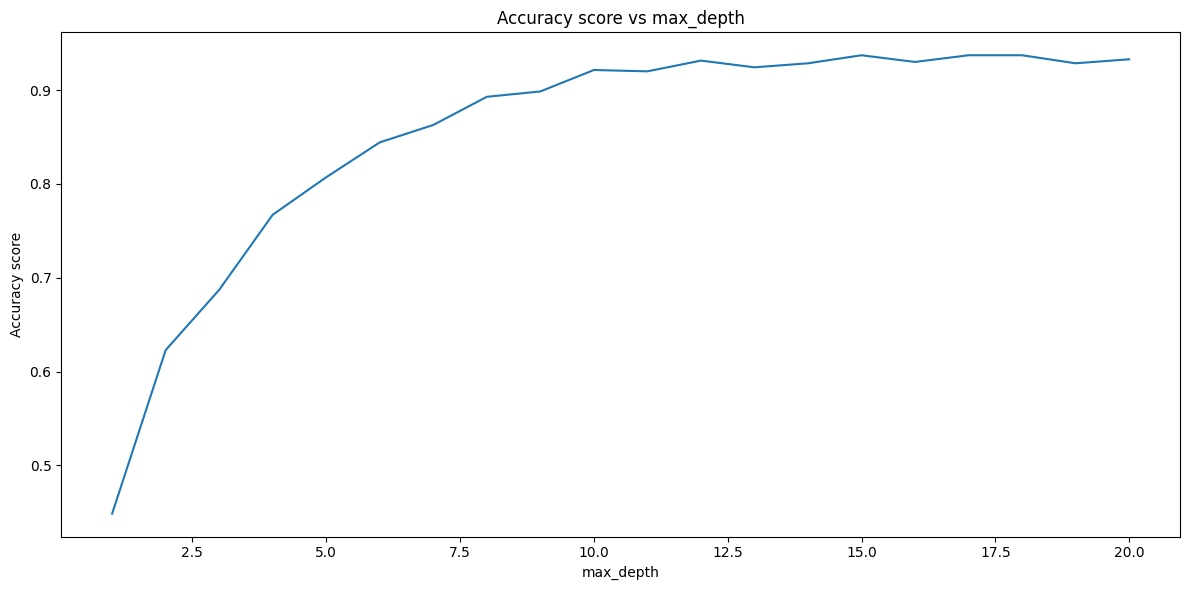

In [18]:
from sklearn.ensemble import RandomForestClassifier
max_depts=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,None]
ac_score=[]

for max_dept in max_depts:
    clf = RandomForestClassifier(max_depth=max_dept, random_state=42)
    clf.fit(X_train, y_train)
    ac_score.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(12, 6))
plt.plot(max_depts, ac_score)
plt.title("Accuracy score vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy score")

plt.tight_layout()
plt.show()


# remove the not wanted frequencies

In [ ]:
def drop_frequencies(data, num_freq_to_keep):
    """
    Function to keep the specified number of frequency columns from the data and drop the rest.
    
    parameters:
    data (pd.DataFrame): The input data frame.
    num_freq_to_keep (int): The number of frequency columns to keep.
    
    returns:
    pd.DataFrame: The data frame with only the specified frequency columns kept.
    """
    # Get the title of the table
    title = data.columns.tolist()

    # Identify columns to drop
    columns_to_drop = [col for col in title if 'freq' in col and not any(col.endswith(f'freq {i}') for i in range(1, num_freq_to_keep + 1))]

    # Drop the identified columns
    data.drop(columns=columns_to_drop, inplace=True)

    return data

In [ ]:
import pandas as pd

# Load the data from the file
file_path = "preprocess_data_train_15freq.txt"
data = pd.read_csv(file_path, sep="\t")

# Example usage
data = drop_frequencies(data,1)

print(data.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['Heart beat rate mean', 'Heart beat rate slope',
       'Hand temperature mean', 'Hand temperature slope',
       'Hand acceleration in the x direction freq 1',
       'Hand acceleration in the y direction freq 1',
       'Hand acceleration in the z direction freq 1',
       'Hand gyroscope in the x direction freq 1',
       'Hand gyroscope in the y direction freq 1',
       'Hand gyroscope in the z direction freq 1',
       'Hand magnetometer in the x direction freq 1',
       'Hand magnetometer in the y direction freq 1',
       'Hand magnetometer in the z direction freq 1', 'Chest temperature mean',
       'Chest temperature slope',
       'Chest acceleration in the x direction freq 1',
       'Chest acceleration in the y direction freq 1',
       'Chest acceleration in the z direction freq 1',
       'Chest gyroscope in the x direction freq 1',
       'Chest gyroscope in the y direction freq 1',
       'Chest gyroscope in the z direction